<ipython-input-7-42b19c7160e3>:12: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


RMSE: 0.81


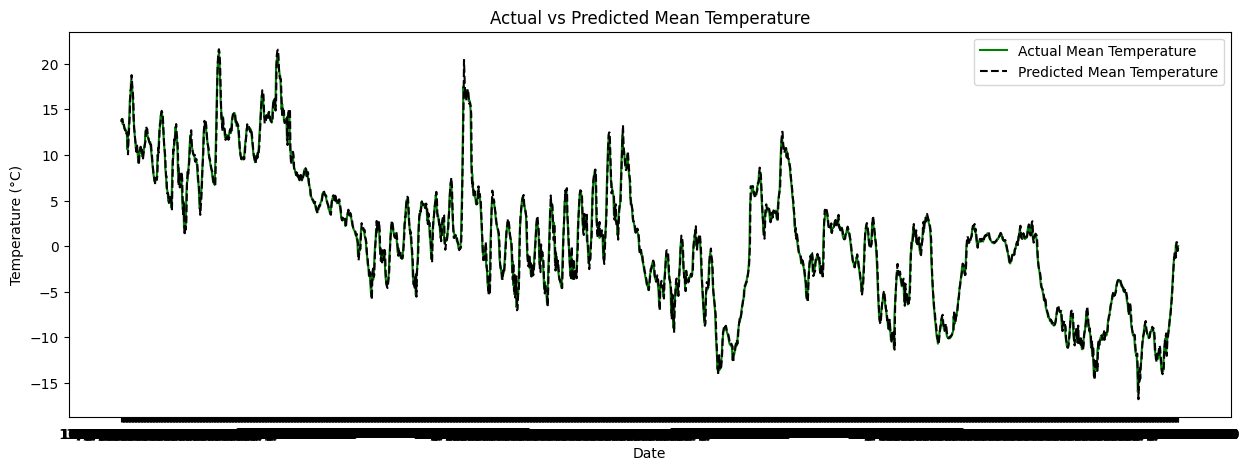

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

dataset_path = r"/content/sample_data/1. Weather Data.csv"

data = pd.read_csv(dataset_path, parse_dates=['Date'], index_col='Date')

data.fillna(method='ffill', inplace=True)

target = 'Temperature'
lag_days = 7

for i in range(1, lag_days + 1):
    data[f'Temperature_lag{i}'] = data[target].shift(i)

data.dropna(inplace=True)

X = data[[f'Temperature_lag{i}' for i in range(1, lag_days + 1)]]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse:.2f}')

# Plot actual vs predicted temperatures
plt.figure(figsize=(15, 5))
plt.plot(y_test.index, y_test, label="Actual Mean Temperature", color="green")
plt.plot(y_test.index, y_pred, label="Predicted Mean Temperature", color="black", linestyle="dashed")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.title("Actual vs Predicted Mean Temperature")
plt.legend()
plt.show()